<a href="https://colab.research.google.com/github/junjunmeng/Airbnb/blob/main/Udacity_Project1_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seattle Airbnb 
 ## Dataset: https://www.kaggle.com/airbnb/seattle
  ## Inspiration: http://insideairbnb.com/seattle/

 ## Business questions:
  - Can you describe the vibe of each Seattle neighborhood using listing descriptions?
  - What are the busiest times of the year to visit Seattle? By how much do prices spike?
  - Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?


In [3]:
from google.colab import drive
drive.mount('/content/drive')
# set working directory

import os
os.chdir('/content/drive/MyDrive/U-udacity/Project1')


Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline


In [6]:
calendar = pd.read_csv('calendar.csv')
# print(calendar.shape)
# print(calendar.columns)
# calendar.head()

listing = pd.read_csv('listings.csv')
# print(listing.shape)
# print(listing.columns)
# # listing.head()

review = pd.read_csv('reviews.csv')
# print(review.shape)
# print(review.columns)
# # review.head()


### 1. Describe the vibe of each Seattle neighborhood using listing descriptions?

---


In [7]:
# convert currency to number  
listing['price'] = listing['price'].replace('[\$,]', '', regex = True).astype(float)
calendar['price'] = calendar['price'].replace('[\$,]', '', regex = True).astype(float)

# get year from calendar dataframe
calendar['year'] = calendar['date'].year()
calendar['month'] = calendar['date'].month()


In [14]:
# get year from calendar dataframe
import datetime
calendar['year'] = pd.DatetimeIndex(calendar['date']).year
calendar['month'] = pd.DatetimeIndex(calendar['date']).month

Text(0.5, 1.0, 'Mean price by host neighborhood')

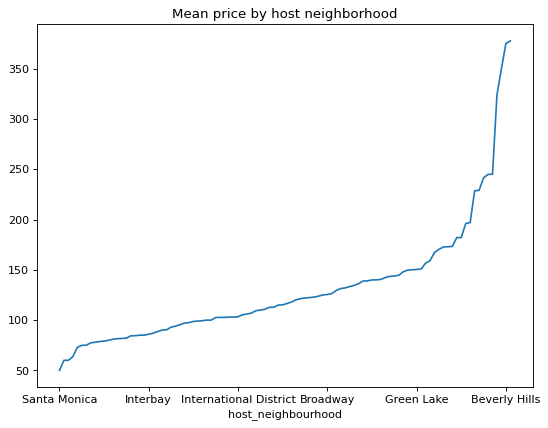

In [31]:
# the mean price of host_neighbourhood
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

meanPrice_neighbour = listing.groupby('host_neighbourhood')['price'].mean().sort_values()

meanPrice_neighbour.reset_index(name =  "mean_price")

fig = meanPrice_neighbour.plot()
plt.title("Mean price by host neighborhood")

#### use a price per square feet to gauge the price of neighbourhood

In [43]:
# price/sq 
listing['pricePerSf'] = listing['price']/listing['square_feet']
listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month,pricePerSf
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000,97.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,127.976166,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919,inf
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,90.250022,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348,NaN
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,20.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,75.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000,0.131667
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,100.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000,0.183077
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,150.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000,0.258846
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,1000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000,inf


Text(0.5, 1.0, 'Mean price per square feet by host neighborhood')

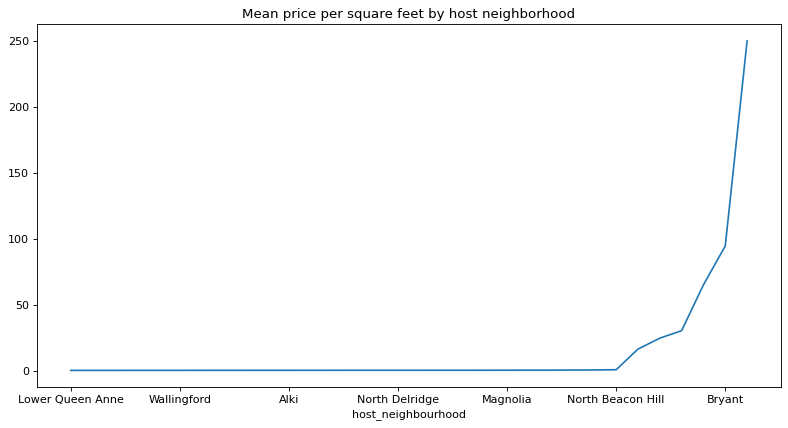

In [69]:
meanPrice_sqft_neighbourhood = listing.groupby('host_neighbourhood')['pricePerSf'].mean().sort_values()

figure(figsize=(12, 6), dpi=80)


fig = meanPrice_sqft_neighbourhood.plot()
plt.title("Mean price per square feet by host neighborhood")

In [70]:
# list the five most expensive neighbourhood

meanPrice_sqft_neighbourhood= meanPrice_sqft_neighbourhood.reset_index(name =  "price_sqft")
meanPrice_sqft_neighbourhood[meanPrice_sqft_neighbourhood['price_sqft'] > 0].sort_values(by = 'price_sqft', ascending = False).iloc[3:10,]
                                                                                                                                                                                                                                                                        

,host_neighbourhood,price_sqft
31,Atlantic,250.000000
30,Bryant,94.500000
29,Madrona,65.000000
28,Ballard,30.212569
27,Greenwood,24.542692
26,Crown Hill,16.261818
25,North Beacon Hill,0.625000


### What are the busiest times of the year to visit Seattle? By how much do prices spike?

In [96]:
# get the price from available = True
calendar_true = calendar[calendar.available == 't']

Text(0.5, 1.0, 'Mean price by year and month')

<Figure size 960x480 with 0 Axes>

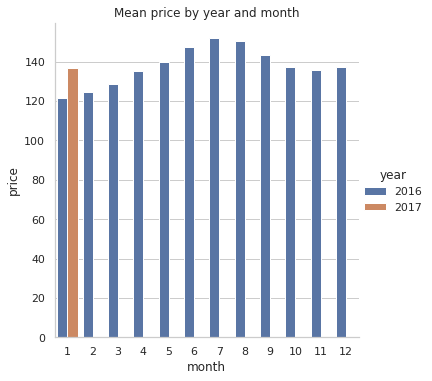

In [97]:
# get the price per year and month
price_by_year_month = calendar_true.groupby(['year', 'month'])['price'].mean().reset_index()
figure(figsize=(12, 6), dpi=80)
# sns.set_theme(style = 'whitegrid')
fig= sns.catplot(data = price_by_year_month, kind = 'bar', hue = 'year',  x= 'month', y ='price')
# fig.legend.set_title(")
plt.title("Mean price by year and month")

#### <font color = 'blue'> 2.2 The effect of day of week on the price, which day in a week is the cheapest and which day is most expensive

In [ ]:
calendar_true['dayOfWeek'] = pd.DatetimeIndex(calendar_true['date']).dayofweek

def convert(dayNo):
  if dayNo == 6:
    return 'Sunday'
  if dayNo == 0:
    return 'Monday'
  if dayNo == 1:
    return 'Tuesday'
  if dayNo == 2: 
    return 'Wednesday'
  if dayNo== 3:
    return 'Thursday'
  if dayNo == 4:
    return 'Friday'
  if dayNo == 5:
    return 'Saturday'
calendar_true['DayofWeek'] = calendar_true['dayOfWeek'].apply(convert)
calendar_true = calendar_true.drop(columns = ['dayOfWeek'])

In [100]:
#  convert day of week to names

from pandas.api.types import CategoricalDtype

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

cat_type = CategoricalDtype(categories = cats, ordered= True)

calendar_true['DayofWeek'] = calendar_true['DayofWeek'].astype(cat_type)

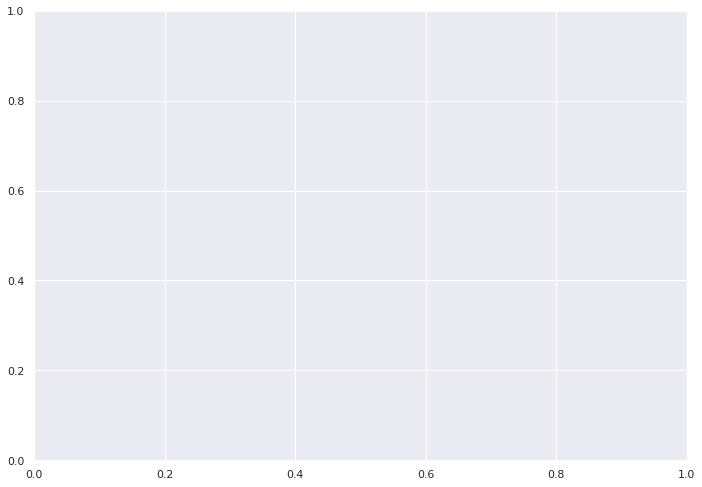

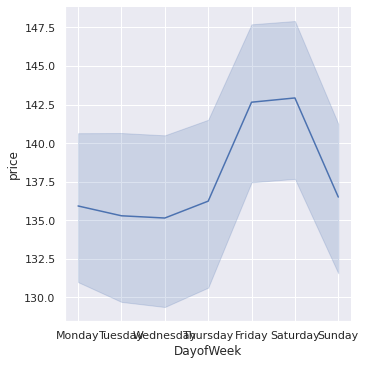

In [114]:
# get the mean price for each day of week and visualize the trend 

price_dayOfWeek= calendar_true.groupby(['month', 'DayofWeek'])['price'].mean().reset_index()
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(11.7, 8.27))

fig = sns.relplot(data = price_dayOfWeek, x = 'DayofWeek', y = 'price', kind = 'line' )
plt.show(fig)

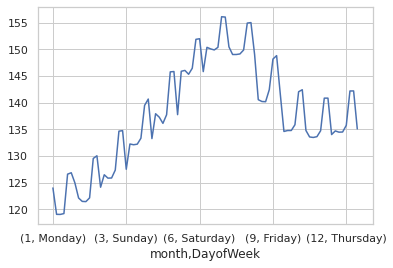

In [106]:
calendar_true.groupby(['month', 'DayofWeek'])['price'].mean().plot()

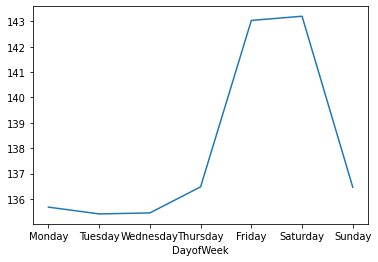

In [56]:
calendar_true.groupby('DayofWeek')['price'].mean().plot()

In [75]:
listing.groupby(['host_since'])['id'].count()

host_since
2008-11-10    4
2009-01-08    1
2009-02-16    2
2009-03-03    1
2009-03-30    1
             ..
2015-12-29    1
2015-12-30    1
2016-01-01    1
2016-01-02    2
2016-01-03    2
Name: id, Length: 1380, dtype: int64

## Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?

In [57]:
listing.groupby['id']

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [58]:
calendar.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [59]:
review.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [60]:
review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [61]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,pricePerSf
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,85.0,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,NaN
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,150.0,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48,NaN
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,ht

In [62]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
